# REAL RACING 3 CARS - DATA ANALYSIS

# PART 1 - REVISION 6 - FINAL

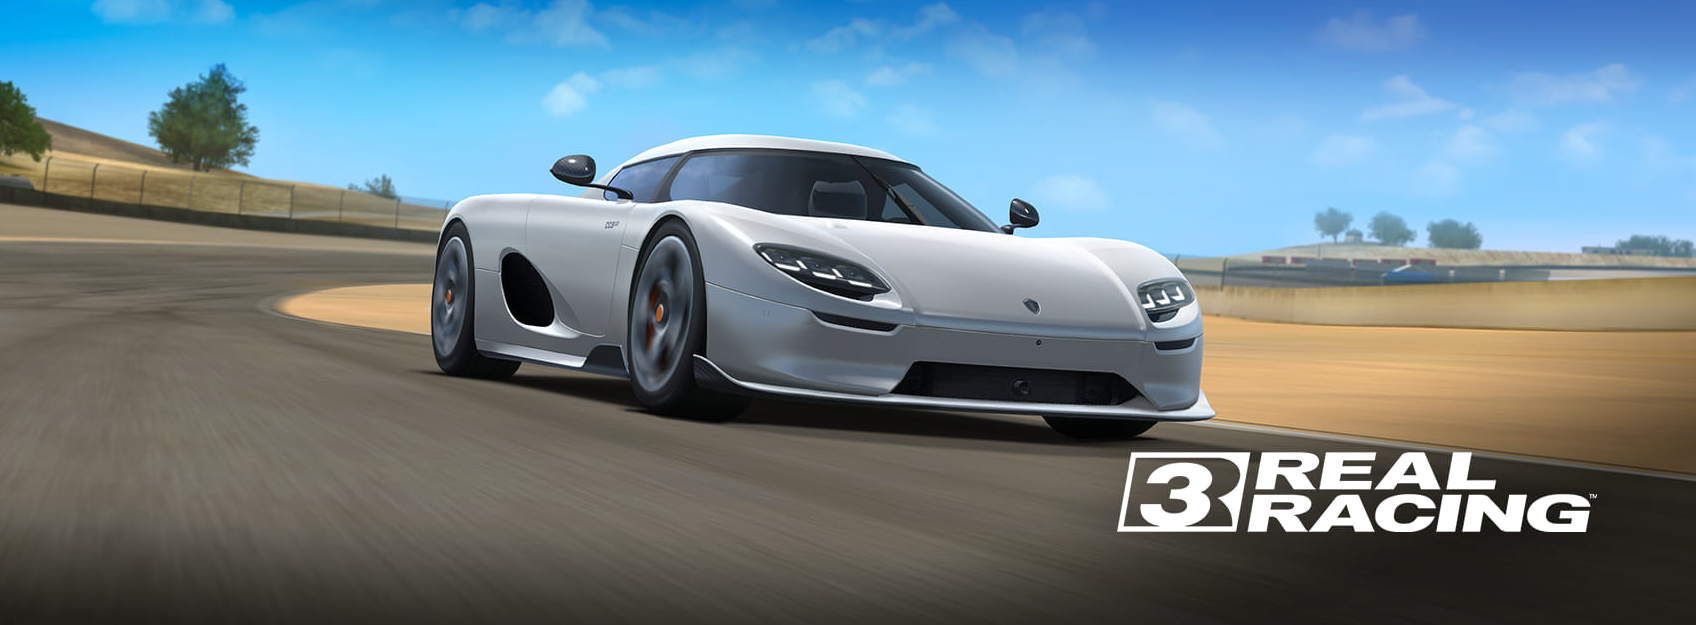

## **Welcome to my 1st part of data analysis for Real Racing 3 cars!**

### This is the 6th revision of the analysis, Part 1, including all cars presented up to game version 14.0 (Final Version).

_As always, let's begin with importing the necessary modules first:_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

And, of course, we have to read the dataframe that contains the data of all cars...

**There's something that needs to be preprocessed:** When viewed from GitHub repo, it seems that some tables might have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the any column of the dataset during rendering. To avoid this issue, all values in `Price` column that contain `$` should be changed to `dollar` before we begin.

In [2]:
rr3_df = pd.read_csv('real_racing_3_cars_v14_0.csv')
pd.set_option('display.max_columns', None)

In [3]:
for i in range(len(rr3_df)):
    if type(rr3_df.loc[i, 'Price']) != float and rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

## Initial Check

All right! After this preprocessing step, let's see what we have in the **first 10 rows**:

In [4]:
rr3_df.head(8)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
0,Acura,NSX (2017),46.7,306,3.10,31.7,1.09,S,M4,2,450 Gold,180,1665,Yes,No,No,Yes,No,Yes,Yes,No,No,No
1,Acura,NSX Type S,48.9,307,2.90,32.0,1.10,S,M4,1,600 Gold,180,1812,Yes,No,No,Yes,No,No,No,Yes,No,No
2,Acura,NSX GT3,65.2,274,3.02,29.6,1.65,R,MR,2,750 Gold,180,1990,Yes,No,Yes,No,No,No,No,No,No,No
3,Acura,ARX-05,78.5,322,2.80,25.6,1.76,R,MR,1,850 Gold,180,1997,Yes,No,Yes,No,No,No,No,No,No,No
4,Acura,ARX-06,84.5,335,2.60,23.2,1.78,R,MR,2,2650000 Mdollar,180,0,Yes,No,Yes,No,No,No,No,Yes,No,Yes
5,Alfa Romeo,Giulietta TCR,34.5,241,5.30,29.3,1.30,R,FF,1,180 Gold,180,1332,Yes,No,No,Yes,No,No,No,No,No,No
6,Alfa Romeo,4C,29.4,257,4.34,30.2,1.05,P,MR,2,200 Gold,180,1415,Yes,No,No,Yes,No,Yes,Yes,No,No,No
7,Alfa Romeo,155 V6 TI,38.0,274,4.60,29.0,1.35,R,F4,2,300 Gold,180,1665,Yes,Yes,No,Yes,No,Yes,No,No,No,No


And, in the **last 10 rows**:

In [5]:
rr3_df.tail(10)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
530,Toyota,Camry (Joe Gibbs Racing - 2021),45.4,298,3.45,29.3,1.12,R,FR,1,2150000 Mdollar,180,0,No,No,Yes,No,No,No,No,No,No,No
531,Toyota,Camry (23XI Racing - 2021),45.4,301,3.42,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,Yes,No,No,No,No,No,No,No
532,Toyota,Camry TRD (2022),45.3,293,3.44,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,Yes,No,No,No,Yes,No,No,No
533,Toyota,Camry TRD (2023),46.7,296,3.34,29.0,1.12,R,FR,1,2150000 Mdollar,180,0,No,No,Yes,No,No,No,No,Yes,No,No
534,Toyota,GR Yaris Rally1 Hybrid,43.2,201,2.70,29.7,1.37,R,F4,2,2250000 Mdollar,260,0,Yes,No,Yes,No,No,No,No,Yes,No,No
535,Toyota,TS040 Hybrid (2014),89.4,394,2.50,26.2,1.82,R,M4,4,950 Gold,325,2192,Yes,No,Yes,Yes,Yes,No,No,No,No,No
536,Volkswagen,Golf GTI (2021),15.4,249,5.10,33.8,0.97,P,FF,2,300 Gold,180,1377,Yes,No,No,Yes,No,Yes,No,No,No,No
537,Volkswagen,XL Sport,23.7,270,5.50,32.0,1.25,R,M4,2,350 Gold,180,1415,Yes,No,No,Yes,No,Yes,No,No,No,No
538,Volkswagen,ID.R,107.5,269,2.25,19.8,2.45,R,MR,2,1100 Gold,180,2062,Yes,Yes,No,Yes,No,Yes,No,No,Yes,No
539,Zenvo,Aurora Tur,81.2,451,2.30,31.1,1.45,S,M4,2,900 Gold,180,1997,Yes,Yes,No,Yes,No,No,No,No,Yes,No


**Great! The cars dataset is loaded properly and it looks well-prepared for analyses that are going to be performed below.**

## Basic Steps

Let's start with some basic ones: For instance, get the manufacturer and the model name of the **150th car** in the data frame (keep in mind that indexes start at 0, so we have to select the index **149**):

In [6]:
rr3_df.loc[149, ['Manufacturer', 'Model']]

Manufacturer    Ferrari
Model           250 GTO
Name: 149, dtype: object

As expected, this returned **two values** as we performed extraction from two columns (`Manufacturer`, `Model`) with the specific row number (index).

But, when I want it to be formatted as **plain text**, then this string construction should be done like below:

In [7]:
print("{} {}".format(rr3_df.loc[149, 'Manufacturer'], rr3_df.loc[149, 'Model']))

Ferrari 250 GTO


All right, what are the specs of the car at **300th row**?

In [8]:
rr3_df.loc[299, 'PR':'Grip']

PR              57.3
Top Speed        248
Acceleration    2.97
Braking         26.2
Grip            1.37
Name: 299, dtype: object

Hmmm, according to the base stats above, this one might belong to a **sports car**, but it has unusual low top speed... Maybe, these might fit to one of the available **motorsports car** like **Formula E** or **GT4 class**, who knows...

Anyway, I'd like to see the **price to buy**, **total service time** and **cost** for the car at **400th row**:

In [9]:
rr3_df.loc[399, ['Price', 'Service Time', 'Service Cost']]

Price           950 Gold
Service Time         180
Service Cost        2037
Name: 399, dtype: object

From the results above, it should be **an expensive sports car (or hypercar)** that belongs to a well-known manufacturer. Here, you need **950 Gold** to buy the car and keep it in your garage. The value **180** for **Service Time** means the car needs **180 minutes** for full service and **2037** for **Service Cost** means you've got to spend **2037 R$** to begin servicing the car.

How about the **classes** and **types** for cars between **441st and 450th indexes** in the dataset?

In [10]:
rr3_df.loc[441:450, ['Class', 'Type']]

,Class,Type
441,R,FR(RHD)
442,S,F4
443,R,MR
444,R,M4
445,R,FR
446,R,FF(RHD)
447,R,FR
448,R,MR
449,S,MR
450,S,MR


All right, we can arbitrarity inspect the data of all cars individually like these above all day! But now, let's get more information about Real Racing 3 cars dataset.

## More Info on the Dataset

First of all, **these are the available columns in the dataset** I'm working with:

In [11]:
rr3_df.columns

Index(['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking',
       'Grip', 'Class', 'Type', 'Series', 'Price', 'Service Time',
       'Service Cost', 'Is Available', 'Has Exclusive Events',
       'In Motorsports', 'In Road Collection', 'In Main Career', 'In Season 1',
       'In Season 2', 'In Season 3', 'In Season 4', 'In Season 5'],
      dtype='object')

And that's **current shape** of the dataframe: 

In [12]:
rr3_df.shape

(540, 23)

From these numbers, there are **540 rows**, i.e. 540 cars existed in the dataset; plus **23 different features** (columns).

How about the general statistics of the features which hold **numerical values** (i.e. those with data type stored as `int` or `float64`)?

In [13]:
round(rr3_df.describe(), 2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost
count,540.00,540.00,540.00,540.00,540.00,540.00,540.00,540.00
mean,58.16,305.48,3.36,28.87,1.51,2.27,172.06,1062.92
std,30.04,48.70,1.13,6.20,0.63,1.27,49.14,806.01
min,0.10,180.00,1.63,14.30,0.72,1.00,1.00,0.00
25%,42.48,274.00,2.70,26.80,1.08,1.00,180.00,0.00
50%,54.70,311.50,3.10,29.45,1.33,2.00,180.00,1376.00
75%,77.90,330.00,3.70,31.70,1.65,3.00,180.00,1812.00
max,130.30,502.00,8.50,48.80,4.00,8.00,325.00,2192.00


**Yes!** That's a lot of information we obtained just from one command! As seen above, all these numbers for individual columns were rounded (up to 2 decimals) for easier reading.

Well, these numbers already explain themselves much! However, in case you didn't understand what they meant (the leftmost ones in each row), allow me to clarify:

* **mean** is the average
* **std** is the standard deviation
* **min** & **max** are the minimum and the maximum values
* **25%**, **50%**, **75%** are the 25th percentile, 50th percentile (median), and 75th percentile values, respectively.

I'm much obliged to see that **there are no missing values** in the dataset as the **count** values for all columns above holding numerical values match the total number of rows available!

Meanwhile, let me check this in more solid way to make sure the statement above is correct... _(there shouldn't be visible output according to the code snippet below if everything goes alright)_

In [14]:
for col in ['PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Series', 'Service Time', 'Service Cost']:
    if rr3_df[col].isnull().any() is True:
        print('Missing value exists in {} column.'.format(col))
    else:  print('No missing values were found for column {}'.format(col))

No missing values were found for column PR
No missing values were found for column Top Speed
No missing values were found for column Acceleration
No missing values were found for column Braking
No missing values were found for column Grip
No missing values were found for column Series
No missing values were found for column Service Time
No missing values were found for column Service Cost


Furthermore, we are used to coming across **seasonal events** in the game for nearly **5 years** (starting at **version 9.6** if I'm correct) which were divided into **several rounds** that continue until the next update was released. Each round features **a prize car** and, the final update (v14.0 - _Season 5 Round 3_) featured **Ferrari 296 GTB**.

As an ordinary player, you need to collect enough amount of **Victory Points** through the events within the allowed time interval for that round to get the prize car in your garage, or **a bag of Gold** if you already owned that.

## Get Some Numerical Values

OK, let's continue the analyses...

With `describe()` method, we've seen many **descriptive decimal values**. Can I do the same with `numpy` methods? Let's try them on all `PR` column:

In [15]:
PR = rr3_df['PR'].values
print("Count: {:8}".format(PR.size))
print("Mean:  {:8.4f}".format(PR.mean()))
print("Std.   {:8.4f}".format(PR.std()))
print("Min:   {:8}".format(PR.min()))
print("Max:   {:8}".format(PR.max()))
print("25th, 50th, 75th percentile: {}".format(np.percentile(PR, [25, 50, 75])))

Count:      540
Mean:   58.1569
Std.    30.0164
Min:        0.1
Max:      130.3
25th, 50th, 75th percentile: [42.475 54.7   77.9  ]


Yes, they are all doable and exactly the same values are encountered as above! There is only **a minor difference** at standard deviation value, though... (just 0.024 lower)

## Analyses on PR Values

The information above reveals that the lowest **PR** a car can take is 0.1, thus I'd like to explore which cars have this lowest **PR** value, with all columns visible:

In [16]:
lowest_PR = rr3_df[rr3_df['PR'] == 0.1]
lowest_PR.loc[:]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
375,Mazda,RX-3,0.1,185,7.7,42.1,0.80,P,FR,2,50 Gold,30,582,Yes,No,No,Yes,No,Yes,No,No,No,No
376,Mazda,MX-5 (NA),0.1,195,8.5,43.6,0.86,P,FR,2,60 Gold,40,617,Yes,Yes,No,Yes,No,No,Yes,No,No,No
423,Nissan,Skyline 2000 GT-R (KPGC10),0.1,201,7.9,44.2,0.85,P,FR(RHD),1,50 Gold,30,582,Yes,No,No,Yes,No,No,No,Yes,No,No
456,Porsche,911 Targa (1974),0.1,209,8.2,39.3,0.89,P,RR,1,53000 Rdollar,35,602,Yes,No,No,Yes,No,No,No,No,No,No


**Look at that!** The lowest **PR** value is shared by **4 cars**, not just 1!

Here, among these cars, the **1974 model Porsche 911 Targa** is purchasable with `R$`, while the others **Mazda RX-3**, **Mazda MX-5 (NA)** and **Nissan Skyline 2000 GT-R** cost Gold to buy, but they are not expensive!

What all these cars have in common are that _their top speeds are very low; accelerations are poor; brakings require more distance and significantly less cornering grips_. However, with upgrades applied later, we can bring them to the better shape for racing.

Perhaps, buying **Mazda MX-5 (NA)** are more worthwhile than others, because this one has its own **exclusive events**.

On a positive side, _their servicing times are under 1 hour, and you don't need to pay much for the servicing costs._

Conversely, how about the car with **the highest PR** value?

In [17]:
highest_PR = rr3_df[rr3_df['PR'] == 130.3]
highest_PR.loc[:]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
402,McLaren,MP4-X,130.3,402,1.9,14.3,4.0,R,MR(MHD),2,1200 Gold,240,2117,Yes,Yes,No,Yes,No,No,Yes,No,Yes,No


That's, **McLaren MP4-X**, a futuristic F1-inspired hypercar! Even after lots of updates up until the final version 14.0, it still holds the highest PR!

This car should really deserve to have the highest PR value in the game in terms of its base stats.

If we compare the values with the ones inside the table of numerical values, obtained via `describe()` above, we can validate that it **has the highest cornering grip and lowest braking distance!** However, it **doesn't have the highest top speed and acceleration values!**

## Car Stats

Well, I wonder which one has **the highest top speed** then...

In [18]:
highest_TS = rr3_df['Top Speed'].max()
highest_TS_name = rr3_df[rr3_df['Top Speed'] == highest_TS]
highest_TS_name

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
308,Hennessey,Venom F5,84.5,502,2.52,25.9,1.69,S,MR,2,1000 Gold,180,2062,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No


That's **Hennessey Venom F5**, having the highest top speed (**502 kph**, or, **>310 mph**) even with **no upgrades**! But, the other stat attributes are not enough to put the car above **100 PR**, as revealed above (the values caused the car stay at **84.5**).

Similarly, the car with **the best acceleration** is...

In [19]:
highest_accl = rr3_df['Acceleration'].min()
highest_accl_name = rr3_df[rr3_df['Acceleration'] == highest_accl]
highest_accl_name

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
49,Automobili Pininfarina,Battista with Furiosa,82.6,349,1.63,28.9,1.6,S,M4,1,1000 Gold,180,2062,Yes,No,No,Yes,No,No,No,No,Yes,No


Wow! This superior stat belongs to **Automobili Pininfarina Battista with Furiosa**, which is the fastest **electrical ultra luxury sports car**! Imagine you're driving this in the game, and when you hit the throttle, you'll never believe how immensely quick it can reach the high speeds! However, as a trade-off, this also needs **greater control** while cornering and braking should start at earlier distances in order not to go off-track!

Now, let's see which car appears **the most throughout all career series** (combination of _main_, _bonus_ or _exclusive_ series):

In [20]:
highest_series = rr3_df['Series'].max()
rr3_df[rr3_df['Series'] == highest_series]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
477,Porsche,918 Spyder Concept,60.2,322,3.0,30.2,1.4,S,M4,8,845000 Rdollar,215,1605,Yes,No,No,Yes,Yes,No,Yes,No,No,No


Ah yes, one of my favourite car here, and it still **holds the highest number (8)** in the final version 14.0: **Porsche 918 Spyder Concept**.

This should be a smart choice for any racer to go for full upgrade, right? _That's because, any fully upgraded car will have 2x longer condition before servicing..._

## Servicing Time

OK, lastly, through these numbers above (the stats we've seen with `describe()`), I noticed that the **minimum required servicing time is just 1 minute**.

Thus, **which car does almost not need much servicing time?**

In [21]:
minimum_service_time = rr3_df['Service Time'].min()
rr3_df[rr3_df['Service Time'] == minimum_service_time]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
420,Nissan,Silvia (S15),1.7,243,5.5,34.4,0.85,P,FR(RHD),5,25700 Rdollar,1,342,Yes,No,No,Yes,Yes,No,No,No,No,No


Hey, that's our good ol' friend **Nissan Silvia (S15)**! That was our first car ever to own in the game, right? Plus, if you have ever driven that Japanese, it shouldn't be so expensive to get it to fully upgraded, though! Maybe, even it could be the first ever car to drive with upgrades installed completely.

In contrast, which one has **the highest servicing time**?

In [22]:
max_service_time = rr3_df['Service Time'].max()
rr3_df[rr3_df['Service Time'] == max_service_time]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
535,Toyota,TS040 Hybrid (2014),89.4,394,2.5,26.2,1.82,R,M4,4,950 Gold,325,2192,Yes,No,Yes,Yes,Yes,No,No,No,No,No


Ah yes, it's a **Toyota**! But, not a street legal car; instead, from _Endurance Motorsport Series_ in **Motorsports** section and _Endurance Legends_ in **Legend** section of **Road Collection**.

We disclosed that it needs **325 minutes** (5 hours 25 minutes) to have it fully serviced. Likewise, compared with the numerical values above, **the highest servicing cost** belongs to this car, too (**2192 R$**)!

Speaking of the servicing time, what could be **the median value** of this?

In [23]:
median_service_time = rr3_df['Service Time'].median()
print("Median of service time --> {:.0f} minutes.\n".format(median_service_time))
count_median_service_time = rr3_df[rr3_df['Service Time'] == median_service_time].shape[0]
print("{} cars have this duration of servicing time.".format(count_median_service_time))

Median of service time --> 180 minutes.

358 cars have this duration of servicing time.


OK, it's not surprising that the median value is **180 minutes = 3 hours**, since many lots of new cars that were arrived throughout the new updates, they usually have their service times set to that value.

In the latest game version 14.0, it's been raised to even higher value, **358 cars**!

In [24]:
print("Ratio of cars having service time of 3 hours --> {:.2f} percent".format(
    count_median_service_time/rr3_df.shape[0] * 100))

Ratio of cars having service time of 3 hours --> 66.30 percent


By doing a simple calculation here, we imply that _180-minute servicing time_ accounts for **66.3%** of the cars in total! Without any doubt, that's a **very large share** among all the servicing times!

## No Service Costs

Another thing is, there are such cars **with NO service costs**. Interesting, right? So, what are these?

In [25]:
no_service_cost = rr3_df[rr3_df['Service Cost'] == 0]
print(no_service_cost.shape[0], "cars are free to service!")
no_service_cost.loc[:,['Manufacturer', 'Model', 'Class', 'Service Time', 'Price']]

170 cars are free to service!


,Manufacturer,Model,Class,Service Time,Price
4,Acura,ARX-06,R,180,2650000 Mdollar
19,Aston Martin,Vantage GTE (2019),R,180,1950000 Mdollar
22,Aston Martin,V8 Vantage GT2,R,180,1900000 Mdollar
25,Aston Martin,Vantage GT4,R,180,1000000 Mdollar
26,Aston Martin,DBR1-2,R,180,2300000 Mdollar
...,...,...,...,...,...
530,Toyota,Camry (Joe Gibbs Racing - 2021),R,180,2150000 Mdollar
531,Toyota,Camry (23XI Racing - 2021),R,180,2150000 Mdollar
532,Toyota,Camry TRD (2022),R,180,2150000 Mdollar
533,Toyota,Camry TRD (2023),R,180,2150000 Mdollar


Oh dear! We came across many cars! As you might realize that, these are all from **Motorsports Discipline!** (due to spacing limits, only the first and last few cars are shown above)

It is good to know that you don't need to pay anything when you want to service one of these cars listed above (also that's because they were all utilized for earning `M$`). Moreover, the number doesn't look like small as there are **more than 150 cars** sharing this common feature for that!

Now, I would like to see **the manufacturers and their counts** of cars with FREE servicing:

In [26]:
no_service_cost['Manufacturer'].value_counts()

Manufacturer
Formula 1       64
Formula E       44
Chevrolet       14
Porsche          8
Ford             7
Toyota           6
Aston Martin     4
BMW              4
Audi             3
McLaren          2
Mercedes-AMG     2
Ferrari          2
Bentley          1
Acura            1
Lotus            1
Ligier           1
Hyundai          1
Duqueine         1
Oreca            1
Nissan           1
Peugeot          1
Radical          1
Name: count, dtype: int64

Oh, this looks like a long list in terms of manufacturers, and we can see more different ones that made it to the list; for instance, **Acura**, **Ligier**, **Duqueine**, **Oreca** and **Peugeot**.

This list, by the way, is astonishing in the way that **Formula 1** and **Formula E** both tops the count! In reality, there are many different teams participated through various seasons, but the game encapsulated them all within their corresponding disciplines, no matter which season they were.

Well, let's categorize all these Motorsport disciplines in a broad manner:

* **Formula 1** 2019-2024 Seasons
* **Formula E** Season 6, 7 and 8 (including those from previous Seasons 3, 4 and 5) + Season of Gen3 cars
* **NASCAR** 2020-2023 Seasons
* The rest is derived from _GT3_, _GT4_, _WRC,_ _Euro Track Masters_, _Supercars_, _IMSA GTD_, _IMSA DPi_, _Endurance GT_ and _Endurance Prototypes_ classes.

_Those that are utilized with_ `R$` _are not included, because their servicing costs are not free unlike those with `M$`._

What most of these motorsport cars have in common is that, despite no servicing cost, their servicing times are fixed at **180 minutes**! That should be a clear evidence of why the count of 180-minute servicing-time cars is so high!

In [27]:
print('Distinct servicing times for cars from Motorsport disciplines, purchaseable with M$:\n{} minutes'.format(
    set(no_service_cost['Service Time'].values)))

Distinct servicing times for cars from Motorsport disciplines, purchaseable with M$:
{np.int64(180), np.int64(260), np.int64(255)} minutes


Well, beyond that **180-minute value**, there are two additional different servicing times, **255 & 260 minutes**. Which cars should need such a longer servicing?

In [28]:
no_service_cost[(no_service_cost['Service Time'] == 255) | (no_service_cost['Service Time'] == 260)]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
195,Ford,Puma Rally1 Hybrid,42.9,193,2.60,30.0,1.36,R,F4,2,2250000 Mdollar,260,0,No,No,Yes,No,No,No,No,No,No,Yes
319,Hyundai,i20 N Rally1 Hybrid,44.1,198,2.65,30.1,1.38,R,F4,2,2250000 Mdollar,260,0,Yes,No,Yes,No,No,No,No,No,No,No
445,Nissan,Z GT4,49.5,312,3.90,30.5,1.38,R,FR,3,2000000 Mdollar,255,0,Yes,No,Yes,No,No,No,No,No,Yes,No
534,Toyota,GR Yaris Rally1 Hybrid,43.2,201,2.70,29.7,1.37,R,F4,2,2250000 Mdollar,260,0,Yes,No,Yes,No,No,No,No,Yes,No,No


Oh well, they are the **WRC**-category cars: **Toyota GR Yaris Rally1**, **Ford Puma Rally1 Hybrid** and **Hyundai i20 N Rally1 Hybrid** with service time of **260 minutes** (4 hours 20 minutes).

Although they were built for rallying action, RR3 designed them available for driving on asphalt surface _(asphalt rally?)_ in various race tracks. That looks a bit weird, right? Even after all these updates, I still don't understand why the developers set a different servicing time than the others!

Moreover, **Nissan Z GT4** from GT4 category is another car with greater than 180-minute service time and set to 255 minutes for full servicing.

All right, time to move on... Notice that the count of **Chevrolet** is the highest in terms of no servicing cost when we think about the individual manufacturers. Let me reveal these cars:

In [29]:
no_service_cost[no_service_cost['Manufacturer'] == 'Chevrolet'][['Manufacturer', 'Model', 'Is Available']]

,Manufacturer,Model,Is Available
99,Chevrolet,Corvette Grand Sport,Yes
100,Chevrolet,Camaro Z/28 (Racing),Yes
101,Chevrolet,Corvette C8.R (2020),Yes
114,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2020),No
115,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2020),No
116,Chevrolet,Camaro ZL1 1LE (Richard Childress Racing - 2020),No
117,Chevrolet,Camaro ZL1 1LE (Richard Petty Motorsports - 2020),No
118,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2021),No
119,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2021),No
120,Chevrolet,Camaro ZL1 1LE (Richard Childress Racing - 2021),No


Ah, among all, **10 of them** are from **NASCAR**! However, they are no longer available for purchase in the game, as they all had **limited time** to buy one. You should feel pleased and lucky if you were quick enough to own at least one of them, thus making you eligible to get into oval racing action, similar to real life!

## How much M$ needed?

Furthermore, all Motorsports cars can be obtained only with the special `M$` currency, **introduced in game version 8.0** with the arrival of **2019 Season Formula 1 cars**. 

If you are eager to own them all in the current state, then you would need:

In [30]:
def get_mdollars(vals):
    n = []
    for v in vals:
        n.append(int(v[:-8]))
    return n
mdollars = get_mdollars(no_service_cost['Price'].values)
print("You need {} Mdollars to own all motorsport cars.".format(sum(mdollars)))

You need 348175000 Mdollars to own all motorsport cars.


Well, the restriction is that you can earn up to **250,000 Mdollars** every day! So, **how many days should you play consecutively** in order to buy all of these cars provided that you always earn the maximum amount?

In [31]:
print("You need to play for {:.0f} consecutive days!".format(sum(mdollars) / 250000.0))

You need to play for 1393 consecutive days!


Oh man! That's **nearly 4 years**! I don't even count the **other criterions** for incomes and expenses, such as bonus M$ from events, upgrades, tuning setups, driver levels and team principal levels.

**NOTE:** Before the game shuts down with a couple of months remaining, the developers quadrupled the maximum limits in order allow players to get access to motorsports cars from many different categories in much quicker way. That said, it is possible to earn **1,000,000 Mdollars** every day and can store up to **20 million Mdollars**.

## Exclusive Events

In every new update to the game, we know that it generally selects **one** or **two** cars to be eligible for **Exclusive Events**. However, in order to unlock to these events, you need to **fully upgrade** those car! Yet, as I said before, their durabilities are **doubled** when all the upgrades are completed. Plus, you have other advantages such as **no token usage** for time trial competitions and **free customizations** to change the cars' livery, a great thing for personalization.

Well, **how many of them have gained the right** to be accessed to its own exclusive events?

In [32]:
print(rr3_df['Has Exclusive Events'].value_counts())
print("\n*** That accounts for {:.2f} percent among all cars. ***".format(
     len(rr3_df[rr3_df['Has Exclusive Events'] == 'Yes']) / len(rr3_df) * 100))

Has Exclusive Events
No     379
Yes    161
Name: count, dtype: int64

*** That accounts for 29.81 percent among all cars. ***


With the final version, the number has reached to **161** cars. If possible, **may I name several of them randomly?**

In [33]:
rr3_exclusive = rr3_df[rr3_df['Has Exclusive Events'] == 'Yes']
rr3_exclusive.sample(n=25, random_state=21)[['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Price']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Price
324,Jaguar,C-X75,66.8,354,2.90,29.6,1.46,600 Gold
394,McLaren,P1 GTR,78.8,362,2.40,25.9,1.55,900 Gold
508,Porsche,963 LMDh,85.4,333,2.65,21.9,1.80,2650000 Mdollar
321,Jaguar,XJ220,39.8,349,3.60,36.3,1.05,400 Gold
350,Lamborghini,Aventador SVJ,62.9,349,2.50,28.7,1.20,750 Gold
41,Audi,E-Tron GT Concept,42.9,249,3.20,30.5,1.10,600 Gold
47,Audi,R18 E-Tron Quattro (2015),90.6,378,2.61,25.6,2.10,950 Gold
354,Lamborghini,Sián FKP 37,67.5,354,2.70,29.0,1.40,750 Gold
476,Porsche,909 Bergspyder,50.3,249,2.40,29.3,1.05,400 Gold
50,Automobili Pininfarina,Battista Edizione Nino Farina,80.2,349,1.79,28.9,1.52,1000 Gold


This random list indicates that any cars with exclusive events might be cheap or expensive, as well as their base **PR** value might be low or high. Hence, it's up to you if you'd like to access those prestigious events, then you need a pile of **Gold**, **R\$**, or **M\$** for full upgrade that can exceed the original price value for any car with exclusive event availability.

## Main Career Series

Now, let me investigate the cars in **main career series** that you can race in **Road Collection**. In order to own all for earning good amount of **R$** particularly, then the requirement is written in the code result below:

In [34]:
def get_total_curr_counts(vals):
    r, g = 0, 0
    for v in vals:
        if v[-7:] == 'Rdollar':   r += 1
        elif v[-4:] == 'Gold':    g += 1
    return r, g
def get_total_prices(vals):
    r, g = [], []
    for v in vals:
        if v[-7:] == 'Rdollar':   r.append(int(v[:-8]))
        elif v[-4:] == 'Gold':    g.append(int(v[:-5]))
    return r, g
rr3_main_career = rr3_df[rr3_df['In Main Career'] == 'Yes']
rdollar_cnt, gold_cnt = get_total_curr_counts(rr3_main_career['Price'].values)

print("There are {} cars available in main career series. ({} with R$, {} with Gold)".format(
    rr3_main_career.shape[0], rdollar_cnt, gold_cnt))
print("\nThis accounts for {:.2f} percent among all cars.".format((rr3_main_career.shape[0] / rr3_df.shape[0]) * 100))
rdollars, golds = get_total_prices(rr3_main_career['Price'].values)
print("\nYou should accumulate {} R$ and {} Gold to buy all these cars.".format(sum(rdollars), sum(golds)))

There are 93 cars available in main career series. (65 with R$, 28 with Gold)

This accounts for 17.22 percent among all cars.

You should accumulate 33006755 R$ and 13915 Gold to buy all these cars.


Let's print **some examples of cars from main career series**:

In [35]:
rr3_main_career.sample(n=20, random_state=9)[['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Price']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Price
33,Audi,TT RS Coupe (2012),18.8,249,4.10,36.9,0.89,56850 Rdollar
171,Ford,Mustang GT Premium,20.5,264,4.50,36.3,0.96,125 Gold
126,Dodge,Charger R/T,8.4,235,5.20,34.7,0.82,36495 Rdollar
446,Nissan,GT-R LM Nismo (2015),90.1,391,2.40,26.8,1.80,950 Gold
128,Dodge,Charger SRT8,14.5,282,4.80,36.6,0.88,46250 Rdollar
143,Ferrari,458 Italia,43.0,325,3.40,32.0,1.03,720000 Rdollar
385,McLaren,F1 GTR,51.1,362,3.90,30.2,1.30,630 Gold
12,Aston Martin,Vanquish,33.6,295,4.10,31.4,1.02,110 Gold
65,BMW,Z4 GT3,50.3,290,3.20,29.9,1.24,457000 Rdollar
170,Ford,Shelby GT500,27.5,290,4.20,32.6,1.00,63100 Rdollar


## Cars in Different Seasons

About the cars which appeared in **Season 1** (derived from 10 rounds); not only the prize cars, but also others in special events, limited-time events and corresponding bonus career series:

In [36]:
rr3_season_one = rr3_df[rr3_df['In Season 1'] == 'Yes']
print("Total of {} cars appeared in Season 1 of Real Racing 3.".format(len(rr3_season_one)))

Total of 113 cars appeared in Season 1 of Real Racing 3.


And, here are some example cars from the 1st Season; note that **2021 Season of Formula 1** and **8th Season of Formula E** cars were also featured throughout this season:

In [37]:
rr3_season_one.sample(n=20, random_state=15)[['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Price']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Price
78,Brabham,BT62,68.9,319,2.88,27.4,1.55,800 Gold
387,McLaren,720S GT3,65.4,283,3.04,29.6,1.62,1300000 Mdollar
104,Chevrolet,Corvette C7 ZR1,49.4,346,3.20,34.7,1.18,550 Gold
301,Formula E,Rokit Venturi Racing Mercedes-EQ Silver Arrow ...,57.2,243,2.94,26.5,1.38,2250000 Mdollar
302,Formula E,Jaguar TCS Racing Jaguar I-Type 5,57.3,248,2.97,26.2,1.37,2250000 Mdollar
507,Porsche,911 GT2 RS Clubsport 25,77.4,346,2.58,28.0,1.66,900 Gold
42,Audi,R8 (2021),61.8,330,3.00,29.6,1.40,750 Gold
37,Audi,Quattro B2,3.5,222,6.90,40.8,0.95,225 Gold
224,Formula 1,Scuderia AlphaTauri Honda AT02,115.7,312,2.05,16.8,3.02,2500000 Mdollar
488,Porsche,911 Turbo S,79.2,330,2.60,26.8,1.40,725 Gold


Let's move that further by also inspecting the number of cars and several examples appeared in **Season 2**:

In [38]:
rr3_season_two = rr3_df[rr3_df['In Season 2'] == 'Yes']
print("Total of {} cars appeared in Season 2 of Real Racing 3.".format(len(rr3_season_two)))

Total of 94 cars appeared in Season 2 of Real Racing 3.


From the list below, we can understand that **2022 Season of Formula 1** cars were featured within Season 2, including **Gen3 Championship Car** from **Formula E**:

In [39]:
rr3_season_two.sample(n=20, random_state=13)[['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Price']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Price
167,Ferrari,Daytona SP3,66.1,340,2.60,26.5,1.30,850 Gold
79,Bugatti,EB 110 Super Sport,34.7,343,4.40,34.1,1.11,410 Gold
377,Mazda,RX-7 Spirit R (FD),17.2,256,4.80,34.1,0.92,175 Gold
380,Mazda,787B,68.9,351,3.34,29.9,1.68,800 Gold
522,Subaru,Impreza 22B-STI Version,5.4,229,4.90,38.1,0.99,300 Gold
308,Hennessey,Venom F5,84.5,502,2.52,25.9,1.69,1000 Gold
400,McLaren,Senna GTR,79.5,362,2.80,25.9,1.70,1000 Gold
87,Bugatti,Bolide,96.0,500,2.10,29.0,2.25,1150 Gold
396,McLaren,Senna,66.2,335,2.90,28.0,1.45,850 Gold
412,Mercedes-Benz,AMG CLK GTR Straßenversion,42.3,344,3.67,35.4,1.14,650 Gold


Let's do the same for the cars eligible in **Season 3**:

In [40]:
rr3_season_three = rr3_df[rr3_df['In Season 3'] == 'Yes']
print("Total of {} cars appeared in Season 3 of Real Racing 3.".format(len(rr3_season_three)))

Total of 64 cars appeared in Season 3 of Real Racing 3.


The list below reveals that **2023 Season of Formula 1** and **2023 Season of NASCAR** cars have made it to that season. However, we no longer see any more content from NASCAR in the game, as this was another division that cannot be accessed by newcomers...

In [41]:
rr3_season_three.sample(n=20, random_state=18)[['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Price']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Price
410,Mercedes-AMG,GT3,60.2,328,3.00,27.4,1.30,650 Gold
334,Koenigsegg,Jesko Absolut,88.3,499,2.35,26.2,1.60,1200 Gold
448,Oreca,07 LMP2,78.5,322,3.00,25.3,1.74,2500000 Mdollar
31,Aston Martin,Valkyrie,95.5,367,2.60,21.3,2.53,1150 Gold
163,Ferrari,499P,90.9,348,2.55,21.9,1.90,2750000 Mdollar
77,BMW,M Hybrid V8,84.2,332,2.70,22.6,1.80,2650000 Mdollar
194,Ford,Mustang Dark Horse,46.2,267,4.10,31.7,1.07,500 Gold
383,McLaren,12C Spider,50.7,328,3.10,30.8,1.13,300 Gold
248,Formula 1,Alfa Romeo Racing Stake C43,115.5,315,2.04,16.5,2.92,1700000 Mdollar
150,Ferrari,812 Superfast,55.0,356,2.90,30.5,1.12,600 Gold


We are not finished yet. Let's perform the same thing for the cars appeared in **Season 4**:

In [42]:
rr3_season_four = rr3_df[rr3_df['In Season 4'] == 'Yes']
print("Total of {} cars appeared in Season 4 of Real Racing 3.".format(len(rr3_season_four)))

Total of 64 cars appeared in Season 4 of Real Racing 3.


There, from this list, **2024 Season Formula 1 Cars** were featured in the season, including some fascinating road cars joining the roster, such as **Aston Martin Valour**, **Ferrari SF90 XX Stradale** and some motorsport cars, e.g. **Peugeot 9X8 Hypercar**:

In [43]:
rr3_season_four.sample(n=20, random_state=14)[['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Price']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Price
79,Bugatti,EB 110 Super Sport,34.7,343,4.40,34.1,1.11,410 Gold
259,Formula 1,McLaren F1 Team MCL38,115.8,319,2.04,15.5,2.95,2000000 Mdollar
510,Radical,SR10 XXR,91.0,290,2.40,28.6,2.40,2800000 Mdollar
308,Hennessey,Venom F5,84.5,502,2.52,25.9,1.69,1000 Gold
24,Aston Martin,Valour,53.9,333,3.20,27.1,1.15,600 Gold
413,Mercedes-AMG,GT Black Series,60.5,325,2.90,28.0,1.30,750 Gold
316,Honda,Civic Type-R (2023),20.6,272,4.90,34.3,1.02,300 Gold
175,Ford,Focus ST,10.1,249,5.50,36.9,0.95,150 Gold
159,Ferrari,SF90 XX Stradale,79.8,346,1.90,27.4,1.50,900 Gold
393,McLaren,Artura,59.4,330,2.60,31.6,1.25,650 Gold


Finally, the cars from **Season 5**, which did not last long overall (just 3 rounds) and halted at the **3rd Round** as the game entered its final lap!

In [44]:
rr3_season_five = rr3_df[rr3_df['In Season 5'] == 'Yes']
print("Total of {} cars appeared in Season 5 of Real Racing 3.".format(len(rr3_season_five)))

Total of 26 cars appeared in Season 5 of Real Racing 3.


Without any random selection, here are the cars that took part in **Season 5** (new ones include **Audi S1 E-Tron Quattro** and **Radical RXC**):

In [45]:
rr3_season_five[['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Price']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Price
4,Acura,ARX-06,84.5,335,2.60,23.2,1.78,2650000 Mdollar
30,Aston Martin,Vulcan AMR Pro,75.2,346,2.70,26.8,1.60,825 Gold
45,Audi,S1 E-Tron Quattro,45.1,200,2.40,36.9,1.25,750 Gold
70,BMW,M3 GTR Street,46.5,249,3.60,28.6,1.30,520 Gold
77,BMW,M Hybrid V8,84.2,332,2.70,22.6,1.80,2650000 Mdollar
84,Bugatti,Centodieci,78.2,380,2.32,30.8,1.60,900 Gold
195,Ford,Puma Rally1 Hybrid,42.9,193,2.60,30.0,1.36,2250000 Mdollar
333,Koenigsegg,Jesko,84.1,483,2.50,26.8,1.66,1100 Gold
334,Koenigsegg,Jesko Absolut,88.3,499,2.35,26.2,1.60,1200 Gold
354,Lamborghini,Sián FKP 37,67.5,354,2.70,29.0,1.40,750 Gold


## **All right folks, that's all for the 1st part of analysis for Cars in Real Racing 3!**

**In the next part, my aim will be to reveal more statistical info for better insight of this dataset; and perhaps, putting a few visualization charts.**

# KEEP RACING UNTIL THE SHUTDOWN!

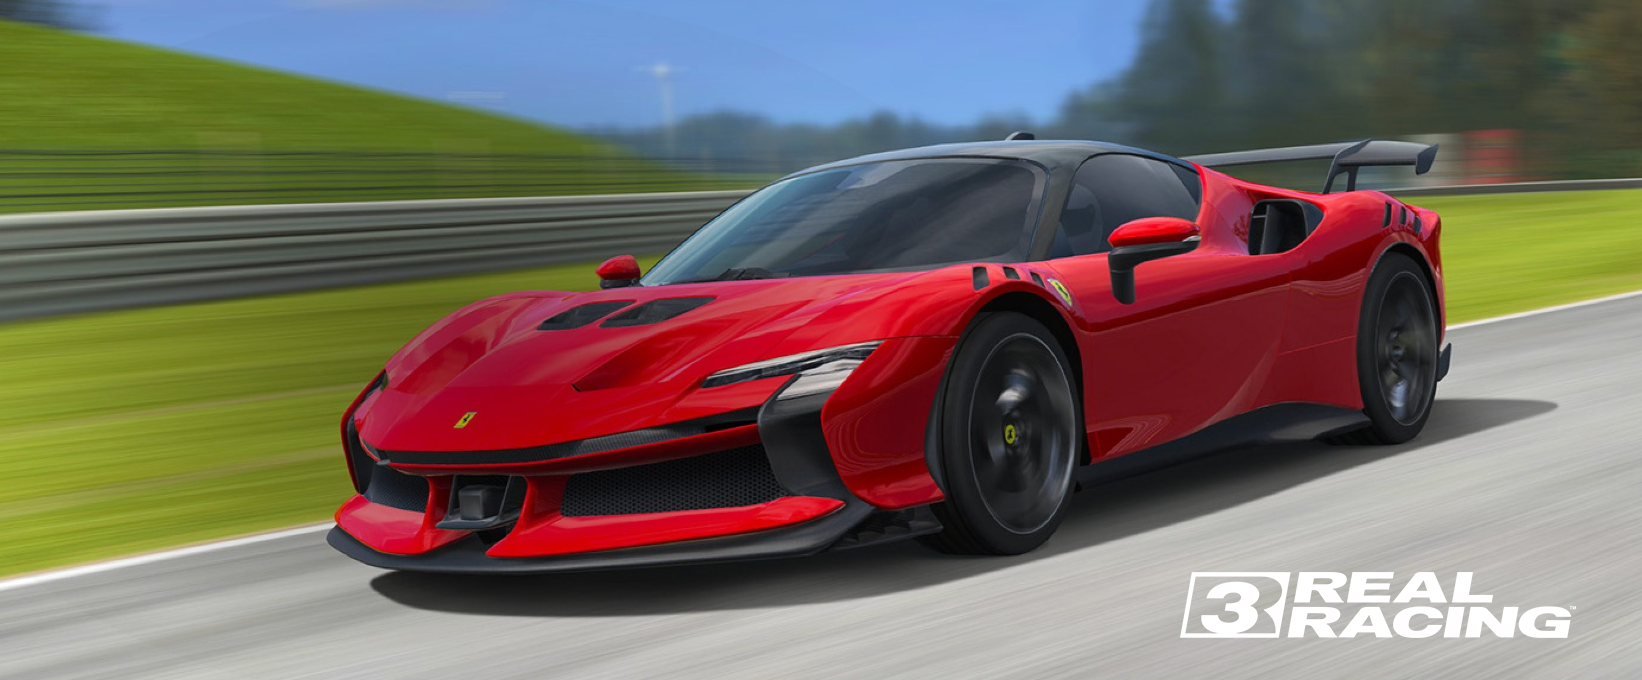